In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('c:\\Users\\hp\\Downloads\\BikeSharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [4]:
# Checking for duplicated values
duplicate_values = df.duplicated().sum()
duplicate_values

0

In [5]:
# Encoding the categorical variables
df_encoded = pd.get_dummies(df, columns = ['season', 'weather'], drop_first=True)
df_encoded.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,0,0,0,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,0,0,0,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,0,0,0,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,0,0,0,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,0,0,0,0,0,0


In [6]:
# Summary statistics
df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

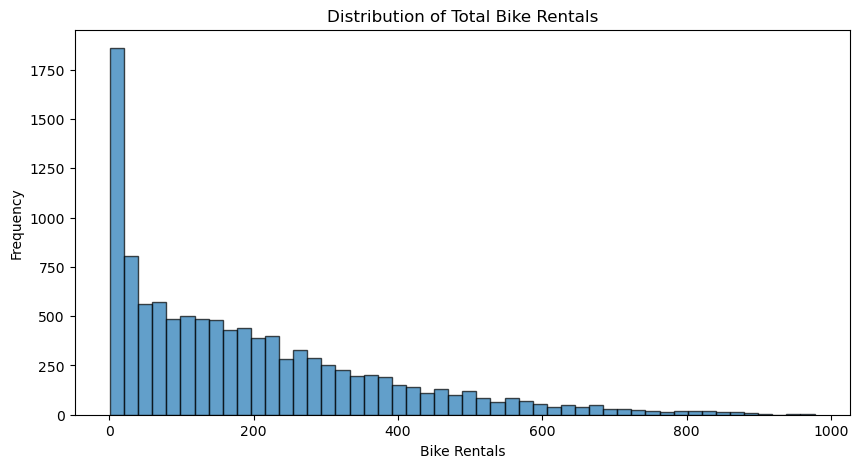

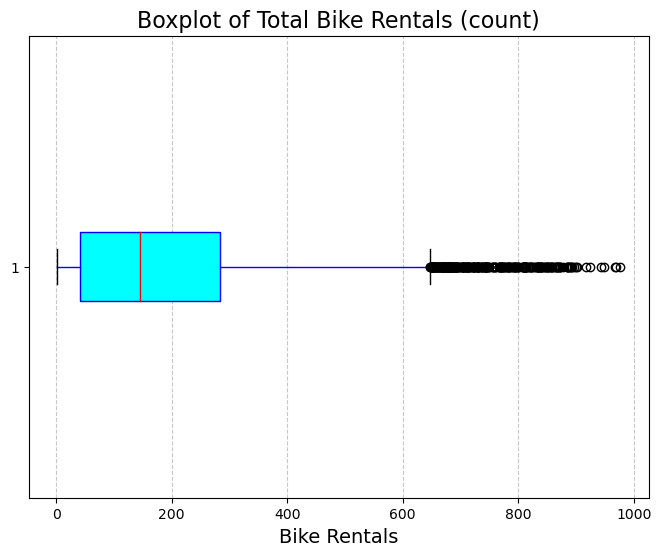

In [7]:
# Visualization
plt.figure(figsize=(10, 5))
plt.hist(df['count'], bins= 50, edgecolor='Black', alpha=0.7)
plt.title('Distribution of Total Bike Rentals')
plt.xlabel('Bike Rentals')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['count'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='cyan', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'))
plt.title('Boxplot of Total Bike Rentals (count)', fontsize=16)
plt.xlabel('Bike Rentals', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_4228\3688568519.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


              season   holiday  workingday   weather      temp     atemp  \
season      1.000000  0.029368   -0.008126  0.008879  0.258689  0.264744   
holiday     0.029368  1.000000   -0.250491 -0.007074  0.000295 -0.005215   
workingday -0.008126 -0.250491    1.000000  0.033772  0.029966  0.024660   
weather     0.008879 -0.007074    0.033772  1.000000 -0.055035 -0.055376   
temp        0.258689  0.000295    0.029966 -0.055035  1.000000  0.984948   
atemp       0.264744 -0.005215    0.024660 -0.055376  0.984948  1.000000   
humidity    0.190610  0.001929   -0.010880  0.406244 -0.064949 -0.043536   
windspeed  -0.147121  0.008409    0.013373  0.007261 -0.017852 -0.057473   
casual      0.096758  0.043799   -0.319111 -0.135918  0.467097  0.462067   
registered  0.164011 -0.020956    0.119460 -0.109340  0.318571  0.314635   
count       0.163439 -0.005393    0.011594 -0.128655  0.394454  0.389784   

            humidity  windspeed    casual  registered     count  
season      0.190610 

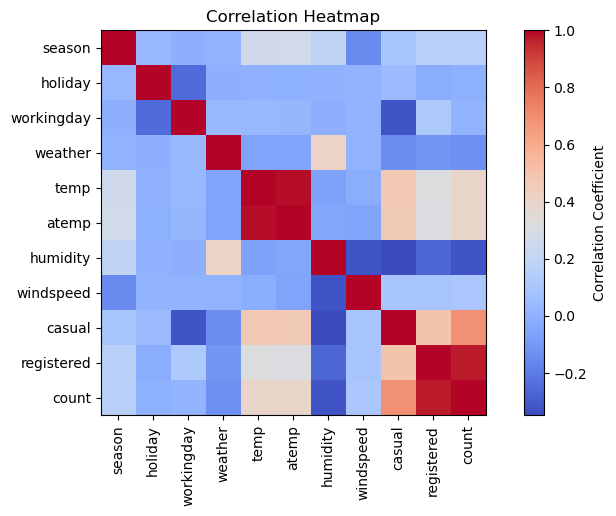

In [8]:
# Correlation Analysis
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 5))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation= 90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# Extracting new features (hour, and rush hour)
# Using hour because bike rentals most liekely vary based on the time of day
df['hour'] = pd.to_datetime(df['datetime']).dt.hour
# Using rush hour because rush hours may have a higher demand for bike rentals
df['is_rush_hour'] = df['hour'].apply(lambda x:1 if 7<= x <=9 or 17<= x <=19 else 0)
# Changing the hour format from 24 to 12
df['hour'] = pd.to_datetime(df['hour'], format='%H').dt.strftime('%I:%M %p')

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,is_rush_hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,12:00 AM,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01:00 AM,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,02:00 AM,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,03:00 AM,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,04:00 AM,0


In [10]:
# Combining the newly extracted features into the encoded dataframe and dropping redundant columns
df_encoded['hour'] = df['hour']
df_encoded['is_rush_hour'] = df['is_rush_hour']

df_encoded = df_encoded.drop(['datetime'], axis=1)

df_encoded.tail()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,weather_2,weather_3,weather_4,hour,is_rush_hour
10881,0,1,15.58,19.695,50,26.0027,7,329,336,0,0,1,0,0,0,07:00 PM,1
10882,0,1,14.76,17.425,57,15.0013,10,231,241,0,0,1,0,0,0,08:00 PM,0
10883,0,1,13.94,15.910,61,15.0013,4,164,168,0,0,1,0,0,0,09:00 PM,0
10884,0,1,13.94,17.425,61,6.0032,12,117,129,0,0,1,0,0,0,10:00 PM,0
10885,0,1,13.12,16.665,66,8.9981,4,84,88,0,0,1,0,0,0,11:00 PM,0


In [11]:
# Preparing the data by creating a new column that contains the hour as a numeric data type
df_encoded['hour_numeric'] = pd.to_datetime(df_encoded['hour'], format='%I:%M %p').dt.hour
# Getting the Log transformation of (count) since it is skewed
df_encoded['log_count'] = np.log1p(df_encoded['count'])

In [12]:
# Checking our new changes
df_encoded.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,weather_2,weather_3,weather_4,hour,is_rush_hour,hour_numeric,log_count
0,0,0,9.84,14.395,81,0.0,3,13,16,0,0,0,0,0,0,12:00 AM,0,0,2.833213
1,0,0,9.02,13.635,80,0.0,8,32,40,0,0,0,0,0,0,01:00 AM,0,1,3.713572
2,0,0,9.02,13.635,80,0.0,5,27,32,0,0,0,0,0,0,02:00 AM,0,2,3.496508
3,0,0,9.84,14.395,75,0.0,3,10,13,0,0,0,0,0,0,03:00 AM,0,3,2.639057
4,0,0,9.84,14.395,75,0.0,0,1,1,0,0,0,0,0,0,04:00 AM,0,4,0.693147


C:\Users\hp\AppData\Local\Temp\ipykernel_4228\2731379210.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_encoded = df_encoded.corr()


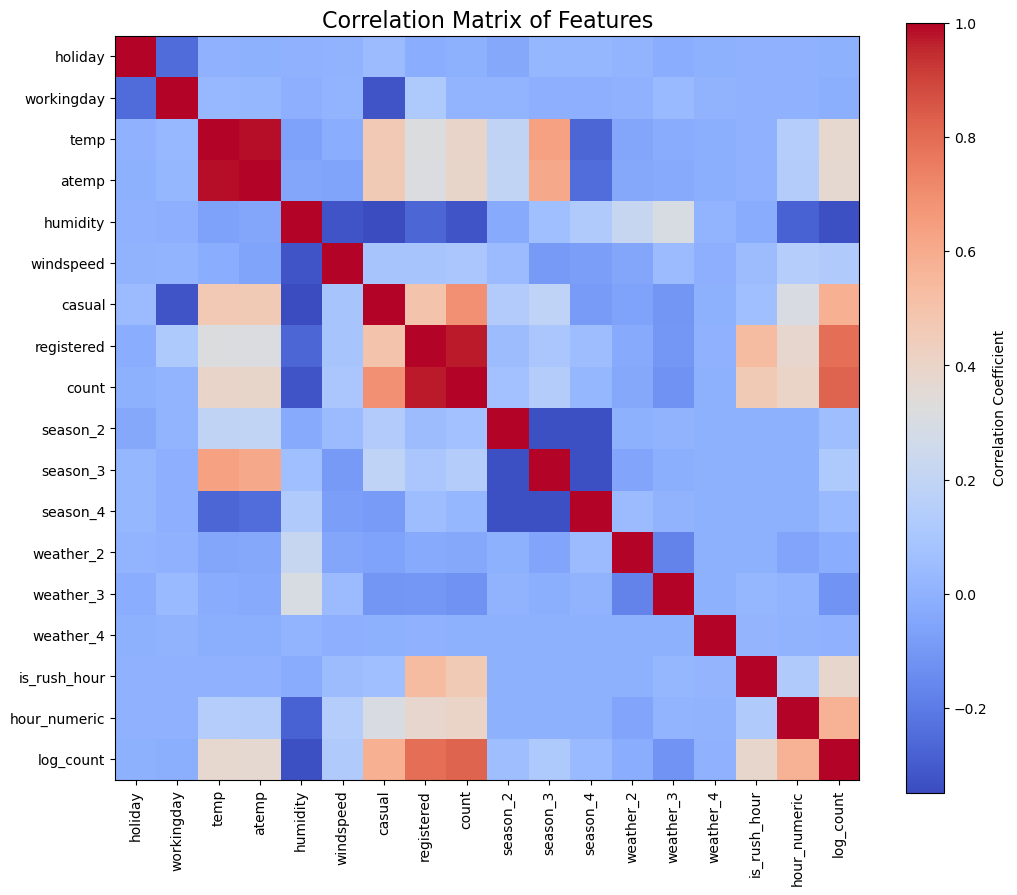

In [13]:
# Correlation matrix of the encoded data frame
correlation_matrix_encoded = df_encoded.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix_encoded, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(ticks=np.arange(len(correlation_matrix_encoded.columns)), labels=correlation_matrix_encoded.columns, rotation=90)
plt.yticks(ticks=np.arange(len(correlation_matrix_encoded.columns)), labels=correlation_matrix_encoded.columns)
plt.grid(False)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

In [22]:
# Feature Selection
features = ['temp', 'humidity', 'windspeed', 'hour_numeric', 'is_rush_hour', 'season_2', 'season_3', 'season_4',
            'weather_2', 'weather_3', 'weather_4', 'workingday', 'registered']
x = df_encoded[features]

# Target variable
y = df_encoded['log_count']

# Adding interaction terms features to the training
x['hour_working'] = x['hour_numeric'] * x['workingday']
x['rush_temp'] = x['temp'] * x['is_rush_hour']

C:\Users\hp\AppData\Local\Temp\ipykernel_4228\3781213630.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['hour_working'] = x['hour_numeric'] * x['workingday']
C:\Users\hp\AppData\Local\Temp\ipykernel_4228\3781213630.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['rush_temp'] = x['temp'] * x['is_rush_hour']


In [15]:
# Normalizing the selected features for training
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [16]:
# Splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [17]:
# Training the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [18]:
# Evaluating the model on the test data
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Sqaured Error: {mse}")
print(f"R^2 Score: {r2_score}")

Mean Absolute Error: 0.7464015045334738
Mean Sqaured Error: 0.867719648407311
R^2 Score: 0.5784709951321378


In [19]:
# Predicted values VS. Actual values
print(f"Actual Vlaues: {y_test.values}")
print(f"Predicted Values: {y_pred}")

Actual Vlaues: [4.85203026 2.63905733 5.09986643 ... 6.23441073 1.79175947 5.48063892]
Predicted Values: [4.93153407 2.78373413 5.89578739 ... 4.98521306 2.75669252 4.33534202]


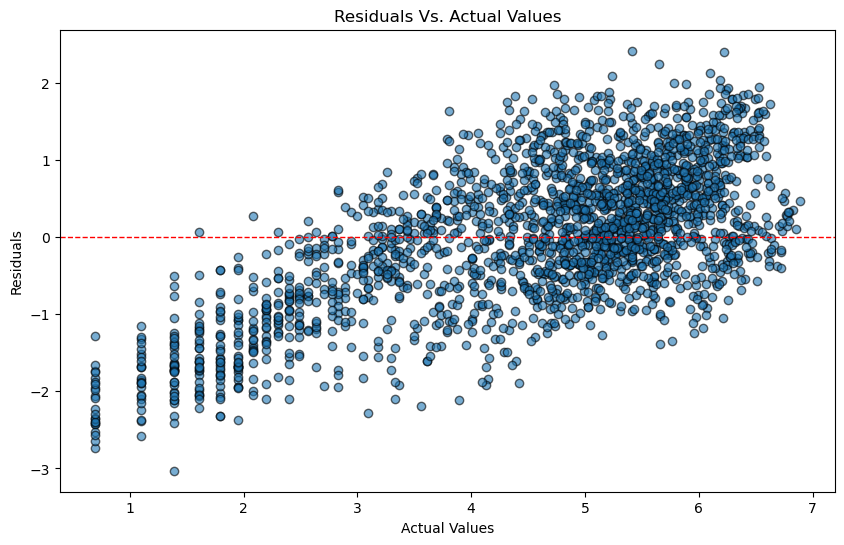

In [20]:
# Plotting the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha = 0.6, edgecolors='k')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals Vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

In [21]:
# Cross-validation scores
cv_scores = cross_val_score(model, x_scaled, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-Validated MAE: {-np.mean(cv_scores):.2f}")

Cross-Validated MAE: 1.42
